# Wave Function Visualizer

In [1]:
# Import useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

## Visualization Framework

There are several ways we could go about plotting a wave function that lives in the xy plane. Given a wave function as a $NxN$ matrix, one could plot the function as a heatmap, but since wave functions are complex valued, the associated probability distribution could be plotted instead.

### Testing different plotting methods

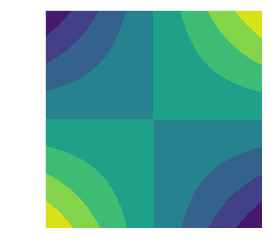

In [2]:
# Let's build a simple matrix to use as demo, testing
# the function f(x,y) = x*y
def test_func(x,y):
    return x*y
X = np.linspace(start=-10,stop=10,num=200)
Y = np.linspace(start=-10,stop=10,num=200)
x, y = np.meshgrid(X, Y, sparse=True)
Z = test_func(x,y)

# Let's plot the result
h = plt.contourf(X, Y, Z)
plt.axis('scaled')
plt.show()

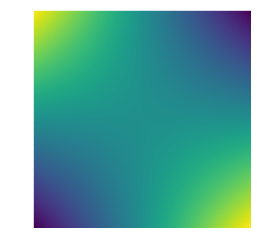

In [3]:
plt.imshow(Z)

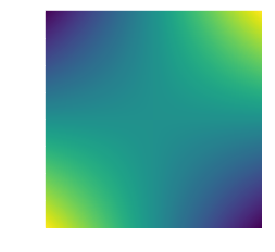

In [4]:
plt.pcolormesh(X,Y,Z,shading='auto')
plt.axis('scaled')
plt.show()

The best method seems to be the pcolormesh plot.

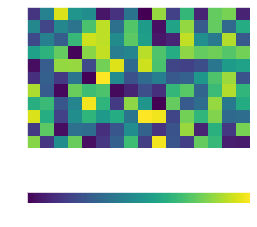

In [5]:
fig, ax = plt.subplots(figsize=(4,4))
im = ax.pcolormesh(np.random.rand(11,16))
ax.set_xlabel("x label")

fig.colorbar(im, orientation="horizontal", pad=0.2)
plt.show()

### Designing a pipeline

In [6]:
# Now we'll use that test as inspiration for building a pipeline,
# so that the hole process of plotting the wave functions
# is easier
def plot_wave_function(X,Y,Z):
    '''
    X : numpy array
        1-D numpy array containing the x values of the dominion.   
    Y : numpy array
        1-D numpy array containing the y values of the dominion.
    Z : numpy array
        2-D numpy array containing the image of the wave function
        for the given X and Y arrays. 
    '''
    # Find max and min values
    max_val = max([np.max(Z.real),np.max(Z.imag)])
    min_val = min([np.min(Z.real),np.min(Z.imag)])
    
    Fig1, (ax1, ax2, ax3) = plt.subplots(nrows=3, 
                                         ncols=1, 
                                         figsize=(13,13))
    Fig1.set_facecolor("k")
    col1 = ax1.pcolormesh(X, Y, Z.real, shading='auto',vmin=min_val,vmax=max_val)
    col2 = ax2.pcolormesh(X, Y, Z.imag, shading='auto',vmin=min_val,vmax=max_val)
    col3 = ax3.pcolormesh(X, Y, np.power(np.abs(Z), 2), 
                          shading='auto')
    ax1.set_title('Re$[\Psi]$',color='w')
    ax2.set_title('Im$[\Psi]$',color='w')
    ax3.set_title('$|\Psi|^2$',color='w')
    
    # Place axes labels
    for ax in [ax1, ax2, ax3]:
        ax.axis('scaled')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        
    # Place colorbars
    #Fig1.colorbar(col1, orientation="vertical", ax=ax1)
    #Fig1.colorbar(col2, orientation="vertical", ax=ax2)
    #Fig1.colorbar(col3, orientation="vertical", ax=ax3)
    
    plt.tight_layout()

## Test case: Free electron in a Moebius strip

The wave function equation for this system is:

$$ i\hbar \frac{\partial}{\partial t}\psi(\vec{x},t) = \frac{-\hbar^2}{2m_e}\nabla^2\psi(\vec{x},t)$$

With special boundary conditions given by the Moebius strip:

$$ \left.\psi(\vec{x},t)\right|_{y=0} = \left.\psi(\vec{x},t)\right|_{y=0} = 0\ ,\ \forall t \in \mathbb{R}_0^{+} $$

$$\wedge \ \ \psi(\vec{x}=(0,y),t) = \psi(\vec{x}=(L,a-y),t)\ ,\  \forall y \in [0,a]\ ,\ \forall t \in \mathbb{R}_0^{+} $$

This is solved by a general solution given by:

$$ \psi(\vec{x},t) = \sum_{l=1}^{\infty}\sum_{n=1}^{\infty}\exp\left[\frac{-i\hbar t\pi^2}{2m_e}\left(\frac{4n^2}{a^2}+\frac{(2l-1)^2}{L^2}\right)\right]\left[C_{l,n}\phi^{(c)}_{l,n}(\vec{x})+S_{l,n}\phi^{(s)}_{l,n}(\vec{x})\right]
$$


$$ + \sum_{l=1}^{\infty}\sum_{n=1}^{\infty}\exp\left[\frac{-i\hbar t\pi^2}{2m_e}\left(\frac{(2n-1)^2}{a^2}+\frac{4l^2}{L^2}\right)\right]\left[ 
p_{l,n}\psi^{(c)}_{l,n}(\vec{x}) + 
q_{l,n}\psi^{(s)}_{l,n}(\vec{x}) \right] $$

where

$$\phi^{(c)}_{l,n}(\vec{x}) \equiv \cos\left(\frac{(2l-1)\pi x}{L}\right)\sin\left(\frac{2\pi yn}{a}\right)$$

$$\phi^{(s)}_{l,n}(\vec{x}) \equiv \sin\left(\frac{(2l-1)\pi x}{L}\right)\sin\left(\frac{2\pi yn}{a}\right)$$

$$\psi^{(c)}_{l,n}(\vec{x}) \equiv \cos\left(\frac{2\pi xl}{L}\right)\sin\left(\frac{(2n-1)\pi y}{a}\right)$$

$$\psi^{(s)}_{l,n}(\vec{x}) \equiv \sin\left(\frac{2\pi xl}{L}\right)\sin\left(\frac{(2n-1)\pi y}{a}\right) $$

For simplicity, we'll use natural units $\hbar\equiv 1$ and $m_e\equiv 1$. We'll also use $L=20$ and $a=5$.

In [7]:
# Define the dominion for the system
L = 20
a = 5
X_def = 500
Y_def = 500
X = np.linspace(start=0,stop=L,num=X_def)
Y = np.linspace(start=0,stop=a,num=Y_def)
x, y = np.meshgrid(X, Y, sparse=True)

In [8]:
# First, let's define the eigenstates
def phi_c(x,y,l,n,L=20,a=5):
    '''
    x,y : float or int
        x and y coordinates for the function to be
        analized at.
    l,n : int, must be >= 1
        Series l and n indexes.
    L : float or int
        Length of the Moebius strip.
    a : float or int 
        Width of the Moebius strip.
    -------
    Output:
        Returns cos(x*pi*l/L)*sin(2*pi*y*n/a)
    '''
    c = np.cos(x*np.pi*(2*l - 1)/L)
    s = np.sin(2*np.pi*y*n/a)
    return c*s

def phi_s(x,y,l,n,L=20,a=5):
    '''
    x,y : float or int
        x and y coordinates for the function to be
        analized at.
    l,n : int, must be >= 1
        Series l and n indexes.
    L : float or int
        Length of the Moebius strip.
    a : float or int 
        Width of the Moebius strip.
    -------
    Output:
        Returns cos(x*pi*l/L)*sin(2*pi*y*n/a)
    '''
    c = np.sin(x*np.pi*(2*l - 1)/L)
    s = np.sin(2*np.pi*y*n/a)
    return c*s

def psi_c(x,y,l,n,L=20,a=5):
    '''
    x,y : float or int
        x and y coordinates for the function to be
        analized at.
    l,n : int, must be >= 1
        Series l and n indexes.
    L : float or int
        Length of the Moebius strip.
    a : float or int 
        Width of the Moebius strip.
    -------
    Output:
        Returns cos(2*x*pi*l/L)*sin((2n-1)*pi*y/a)
    '''
    c = np.cos(2*np.pi*x*l/L)
    s = np.sin((2*n - 1)*np.pi*y/a)
    return c*s

def psi_s(x,y,l,n,L=20,a=5):
    '''
    x,y : float or int
        x and y coordinates for the function to be
        analized at.
    l,n : int, must be >= 1
        Series l and n indexes.
    L : float or int
        Length of the Moebius strip.
    a : float or int 
        Width of the Moebius strip.
    -------
    Output:
        Returns sin(2*x*pi*l/L)*sin((2n-1)*pi*y/a)
    '''
    c = np.sin(2*np.pi*x*l/L)
    s = np.sin((2*n - 1)*np.pi*y/a)
    return c*s


# Now, we have to define the eigenenergies
def E_phi(l,n,L=20,a=5):
    '''
    l,n : int, must be >= 1
        Series l and n indexes.
    L : float or int
        Length of the Moebius strip.
    a : float or int 
        Width of the Moebius strip.
    '''
    n_term = 4*(n**2)/(a**2)
    l_term = ((2*l-1)**2)/(L**2)
    E = (np.pi**2)*(n_term + l_term)/2
    return E

def E_psi(l,n,L=20,a=5):
    '''
    l,n : int, must be >= 1
        Series l and n indexes.
    L : float or int
        Length of the Moebius strip.
    a : float or int 
        Width of the Moebius strip.
    '''
    n_term = ((2*n - 1)**2)/(a**2)
    l_term = 4*(l**2)/(L**2)
    E = (np.pi**2)*(n_term + l_term)/2
    return E

# Once we've defined the eigenstates, we need a function that
# builds the initial state and that returns the individual images
# of the eigenstates
def build_init_state(C, S, p, q, 
                     C_ln, S_ln, p_ln, q_ln, 
                     x, y):
    '''
    C, S, p, q : list of floats or complex
        Coeficient lists for the eigenstates of the Moebius strip.
    C_ln, S_ln, p_ln, q_ln : list of 2-tuples
        Lists of associated indexes with respect to the C, S, p and 
        q coefficients.
    x, y : numpy meshgrid
        x and y sets that represent the dominion of the system.
    -------
    Output:
        Returns a tuple (state, C_funcs, S_funcs, p_funcs, q_funcs, C_E, 
        S_E, p_E, q_E), where state is the initial state of the system, 
        while C_funcs, S_funcs, p_funcs and q_funcs are lists containing 
        the eigenstates for the respective C, S, p and q coefficients, 
        and C_E, S_E, p_E and q_E are the respective energies. 
        Every state returned is given as its image over the 
        dominion defined by x and y.
    '''
    # Check for correct input
    if len(C)!=len(C_ln) or len(S)!=len(S_ln) or len(p)!=len(p_ln) or len(q)!=len(q_ln):
        print('Error: length of coefficients doesn\'t ' +\
              'match length of indexes.')
        return None
    
    # Initialize result lists
    C_funcs, S_funcs, p_funcs, q_funcs = [], [], [], []
    C_E, S_E, p_E, q_E = [], [], [], []
    
    # Initialize state
    state = (x+y)*1j
    state *= 0
    
    for j in range(len(C)):
        C_coef = C[j]
        l, n = C_ln[j][0], C_ln[j][1]
        # Select function for the given indexes
        phi_func = lambda u,v: phi_c(u, v, l=l, n=n)
        # Get result
        j_result = phi_func(x,y)
        E_result = E_phi(l,n)
        
        C_funcs.append(j_result*C_coef)
        C_E.append(E_result)
        state += j_result*C_coef
        
    for j in range(len(S)):
        S_coef = S[j]
        l, n = S_ln[j][0], S_ln[j][1]
        # Select function for the given indexes
        phi_func = lambda u,v: phi_s(u, v, l=l, n=n)
        # Get result
        j_result = phi_func(x,y)
        E_result = E_phi(l,n)
        
        S_funcs.append(j_result*S_coef)
        S_E.append(E_result)
        state += j_result*S_coef
        
        
    for j in range(len(p)):
        p_coef = p[j]
        l, n = p_ln[j][0], p_ln[j][1]
        # Select function for the given indexes
        psi_c_func = lambda u,v: psi_c(u, v, l=l, n=n)
        # Get result
        j_result = psi_c_func(x,y)
        E_result = E_psi(l,n)
        
        p_funcs.append(j_result*p_coef)
        p_E.append(E_result)
        state += j_result*p_coef
        
    for j in range(len(q)):
        q_coef = q[j]
        l, n = q_ln[j][0], q_ln[j][1]
        # Select function for the given indexes
        psi_s_func = lambda u,v: psi_s(u, v, l=l, n=n)
        # Get result
        j_result = psi_s_func(x,y)
        E_result = E_psi(l,n)
        
        q_funcs.append(j_result*q_coef)
        q_E.append(E_result)
        state += j_result*q_coef
        
    # Normalize state
    state = state/np.linalg.norm(state)
        
    return (state, C_funcs, S_funcs, p_funcs, q_funcs, C_E, S_E, p_E, q_E)
    


# We also need to define a function that evolves a given 
# state in time to a given value of t
def step(system, t):
    '''
    system : tuple
        Output from the function build_init_state.
    t : float or int
        Time variable value.
    -------
    Output:
        Updates the state of the system to a time t.
    '''
    state, C_funcs, S_funcs, p_funcs, q_funcs, C_E, S_E, p_E, q_E = system
    # Initialize new state
    new_state = state*0
    
    for j in range(len(C_funcs)):
        C_state = C_funcs[j]
        E = C_E[j]
        new_state += C_state*np.exp(-1j*t*E)
        
    for j in range(len(S_funcs)):
        S_state = S_funcs[j]
        E = S_E[j]
        new_state += S_state*np.exp(-1j*t*E)
        
    for j in range(len(p_funcs)):
        p_state = p_funcs[j]
        E = p_E[j]
        new_state += p_state*np.exp(-1j*t*E)
        
    for j in range(len(q_funcs)):
        q_state = q_funcs[j]
        E = q_E[j]
        new_state += q_state*np.exp(-1j*t*E)
        
        
    # Normalize new state
    new_state = new_state/np.linalg.norm(new_state)
    
    return new_state
    


# Now we'll design a pipeline that gives the temporal 
# evolution for any given state
def evolve(C, S, p, q, 
           C_ln, S_ln, p_ln, q_ln,
           X, Y,
           steps, final_t, 
           fname):
    '''
    C, S, p, q : list of floats or complex
        Coeficient lists for the eigenstates of the Moebius strip.
    C_ln, S_ln, p_ln, q_ln : list of 2-tuples
        Lists of associated indexes with respect to the C, S, p and 
        q coefficients.
    X, Y : numpy array
        X and Y sets that represent the position coordinates of the system.
    steps : int
        Number of timesteps.
    final_t : float or int
        Final value of the time variable (t).
    fname : str
        Template file name for the result images.
    -------
    Output:
        Saves a series of images containing the time evolution of 
        the state specified by the given coefficients, with a 
        timestep of final_t/steps.
    '''
    # Save file with parameters, for reproducibility 
    info_path = fname + '_info.txt'
    info_file = open(info_path, 'w')
    info_file.write('C = ' + str(C) + '\nS = ' + str(S) + '\np = ' + str(p) + '\nq = ' + str(q) +\
                    '\nC_ln = ' + str(C_ln) + '\nS_ln = ' + str(S_ln) + '\np_ln = ' + str(p_ln) +\
                    '\nq_ln = ' + str(q_ln) +\
                    '\nsteps = ' + str(int(steps)) + '\nfinal_t = ' + str(final_t))
    info_file.close()
    # Build grid
    x, y = np.meshgrid(X, Y, sparse=True)
    # Initialize system
    system = build_init_state(C, S, p, q, C_ln, S_ln, p_ln, q_ln, x, y)
    state, C_funcs, S_funcs, p_funcs, q_funcs, C_E, S_E, p_E, q_E = system
    # Define timestep
    timestep = final_t/(steps+1)
    # Get images
    for i in range(steps+1):
        print('Step %d of %d' % (i,steps))
        new_state = step(system, timestep*i)
        plot_wave_function(X,Y,new_state)
        file_number = str(i).zfill(steps%10 + 2)
        path = fname + '_' + file_number + '.png'
        plt.savefig(path,dpi=200)
        plt.close('all')

### Test 1:

In [16]:
C = [1]
C_ln = [[1,1]]
S = []
S_ln = []
p = []
p_ln = []
q = []
q_ln = []

In [17]:
evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=100, final_t=20, 
       fname='moebius_vids/exp1/exp1')

Step 0 of 100
Step 1 of 100
Step 2 of 100
Step 3 of 100
Step 4 of 100
Step 5 of 100
Step 6 of 100
Step 7 of 100
Step 8 of 100
Step 9 of 100
Step 10 of 100
Step 11 of 100
Step 12 of 100
Step 13 of 100
Step 14 of 100
Step 15 of 100
Step 16 of 100
Step 17 of 100
Step 18 of 100
Step 19 of 100
Step 20 of 100
Step 21 of 100
Step 22 of 100
Step 23 of 100
Step 24 of 100
Step 25 of 100
Step 26 of 100
Step 27 of 100
Step 28 of 100
Step 29 of 100
Step 30 of 100
Step 31 of 100
Step 32 of 100
Step 33 of 100
Step 34 of 100
Step 35 of 100
Step 36 of 100
Step 37 of 100
Step 38 of 100
Step 39 of 100
Step 40 of 100
Step 41 of 100
Step 42 of 100
Step 43 of 100
Step 44 of 100
Step 45 of 100
Step 46 of 100
Step 47 of 100
Step 48 of 100
Step 49 of 100
Step 50 of 100
Step 51 of 100
Step 52 of 100
Step 53 of 100
Step 54 of 100
Step 55 of 100
Step 56 of 100
Step 57 of 100
Step 58 of 100
Step 59 of 100
Step 60 of 100
Step 61 of 100
Step 62 of 100
Step 63 of 100
Step 64 of 100
Step 65 of 100
Step 66 of 100
Step 

### Test 2:

In [409]:
C = []
C_ln = []
S = []
S_ln = []
p = [1]
p_ln = [[1,1]]
q = []
q_ln = []

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=100, final_t=20, 
       fname='moebius_vids/exp2/exp2')

Step 0 of 100
Step 1 of 100
Step 2 of 100
Step 3 of 100
Step 4 of 100
Step 5 of 100
Step 6 of 100
Step 7 of 100
Step 8 of 100
Step 9 of 100
Step 10 of 100
Step 11 of 100
Step 12 of 100
Step 13 of 100
Step 14 of 100
Step 15 of 100
Step 16 of 100
Step 17 of 100
Step 18 of 100
Step 19 of 100
Step 20 of 100
Step 21 of 100
Step 22 of 100
Step 23 of 100
Step 24 of 100
Step 25 of 100
Step 26 of 100
Step 27 of 100
Step 28 of 100
Step 29 of 100
Step 30 of 100
Step 31 of 100
Step 32 of 100
Step 33 of 100
Step 34 of 100
Step 35 of 100
Step 36 of 100
Step 37 of 100
Step 38 of 100
Step 39 of 100
Step 40 of 100
Step 41 of 100
Step 42 of 100
Step 43 of 100
Step 44 of 100
Step 45 of 100
Step 46 of 100
Step 47 of 100
Step 48 of 100
Step 49 of 100
Step 50 of 100
Step 51 of 100
Step 52 of 100
Step 53 of 100
Step 54 of 100
Step 55 of 100
Step 56 of 100
Step 57 of 100
Step 58 of 100
Step 59 of 100
Step 60 of 100
Step 61 of 100
Step 62 of 100
Step 63 of 100
Step 64 of 100
Step 65 of 100
Step 66 of 100
Step 

### Test 3:

In [410]:
C = []
C_ln = []
S = []
S_ln = []
p = []
p_ln = []
q = [1]
q_ln = [[1,1]]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=100, final_t=20, 
       fname='moebius_vids/exp3/exp3')

Step 0 of 100
Step 1 of 100
Step 2 of 100
Step 3 of 100
Step 4 of 100
Step 5 of 100
Step 6 of 100
Step 7 of 100
Step 8 of 100
Step 9 of 100
Step 10 of 100
Step 11 of 100
Step 12 of 100
Step 13 of 100
Step 14 of 100
Step 15 of 100
Step 16 of 100
Step 17 of 100
Step 18 of 100
Step 19 of 100
Step 20 of 100
Step 21 of 100
Step 22 of 100
Step 23 of 100
Step 24 of 100
Step 25 of 100
Step 26 of 100
Step 27 of 100
Step 28 of 100
Step 29 of 100
Step 30 of 100
Step 31 of 100
Step 32 of 100
Step 33 of 100
Step 34 of 100
Step 35 of 100
Step 36 of 100
Step 37 of 100
Step 38 of 100
Step 39 of 100
Step 40 of 100
Step 41 of 100
Step 42 of 100
Step 43 of 100
Step 44 of 100
Step 45 of 100
Step 46 of 100
Step 47 of 100
Step 48 of 100
Step 49 of 100
Step 50 of 100
Step 51 of 100
Step 52 of 100
Step 53 of 100
Step 54 of 100
Step 55 of 100
Step 56 of 100
Step 57 of 100
Step 58 of 100
Step 59 of 100
Step 60 of 100
Step 61 of 100
Step 62 of 100
Step 63 of 100
Step 64 of 100
Step 65 of 100
Step 66 of 100
Step 

### Test 4:

In [19]:
C = [5+5j,2j,2,0.5+0.5j]
C_ln = [[1,1],[1,2],[2,1],[2,2]]
S = []
S_ln = []
p = []
p_ln = []
q = []
q_ln = []

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=100, final_t=20, 
       fname='moebius_vids/exp4/exp4')

Step 0 of 100
Step 1 of 100
Step 2 of 100
Step 3 of 100
Step 4 of 100
Step 5 of 100
Step 6 of 100
Step 7 of 100
Step 8 of 100
Step 9 of 100
Step 10 of 100
Step 11 of 100
Step 12 of 100
Step 13 of 100
Step 14 of 100
Step 15 of 100
Step 16 of 100
Step 17 of 100
Step 18 of 100
Step 19 of 100
Step 20 of 100
Step 21 of 100
Step 22 of 100
Step 23 of 100
Step 24 of 100
Step 25 of 100
Step 26 of 100
Step 27 of 100
Step 28 of 100
Step 29 of 100
Step 30 of 100
Step 31 of 100
Step 32 of 100
Step 33 of 100
Step 34 of 100
Step 35 of 100
Step 36 of 100
Step 37 of 100
Step 38 of 100
Step 39 of 100
Step 40 of 100
Step 41 of 100
Step 42 of 100
Step 43 of 100
Step 44 of 100
Step 45 of 100
Step 46 of 100
Step 47 of 100
Step 48 of 100
Step 49 of 100
Step 50 of 100
Step 51 of 100
Step 52 of 100
Step 53 of 100
Step 54 of 100
Step 55 of 100
Step 56 of 100
Step 57 of 100
Step 58 of 100
Step 59 of 100
Step 60 of 100
Step 61 of 100
Step 62 of 100
Step 63 of 100
Step 64 of 100
Step 65 of 100
Step 66 of 100
Step 

### Test 5:

In [414]:
C = []
C_ln = []
S = []
S_ln = []
p = []
p_ln = []
q = [1,0.5,0.33,1/4,1/5,1/6]
q_ln = [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1]]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp5/exp5')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 6:

In [9]:
C = []
C_ln = []
S = []
S_ln = []
p = []
p_ln = []
q = [1,0.5,0.33,1/4,1/5,1/6, 
     1/7,1/8,1/9,1/10,1/11,1/12]
q_ln = [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1], 
        [7,1],[8,1],[9,1],[10,1],[11,1],[12,1]]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp6/exp6')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 7:

In [9]:
C = []
C_ln = []
S = [1,0.5,0.33,1/4,1/5,1/6, 
     1/7,1/8,1/9,1/10,1/11,1/12]
S_ln = [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1], 
        [7,1],[8,1],[9,1],[10,1],[11,1],[12,1]]
p = []
p_ln = []
q = []
q_ln = []

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp7/exp7')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 8:

In [11]:
C = []
C_ln = []
S = []
S_ln = []
p = [np.exp(-(k**2)) for k in range(20)]
p_ln = [[k+1,1] for k in range(20)]
q = [1j*np.exp(-(k**2)) for k in range(20)]
q_ln = [[k+1,1] for k in range(20)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp8/exp8')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 9:

In [12]:
C = []
C_ln = []
S = []
S_ln = []
p = [np.exp(-(k**2)) for k in range(100)]
p_ln = [[k+1,1] for k in range(100)]
q = [1j*np.exp(-(k**2)) for k in range(100)]
q_ln = [[k+1,1] for k in range(100)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp9/exp9')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 10:

In [13]:
C = []
C_ln = []
S = []
S_ln = []
p = [np.exp(-(k**2)) for k in range(30)]
p_ln = [[k+10,1] for k in range(30)]
q = [1j*np.exp(-(k**2)) for k in range(30)]
q_ln = [[k+10,1] for k in range(30)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp10/exp10')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 11:

In [14]:
C = []
C_ln = []
S = []
S_ln = []
p = [np.exp(-(k**2)/1000) for k in range(100)]
p_ln = [[k+1,1] for k in range(100)]
q = [1j*np.exp(-(k**2)/1000) for k in range(100)]
q_ln = [[k+1,1] for k in range(100)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp11/exp11')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 12:

In [15]:
C = []
C_ln = []
S = []
S_ln = []
p = [np.exp(-(k**2)/10000) for k in range(500)]
p_ln = [[k+1,1] for k in range(500)]
q = [1j*np.exp(-(k**2)/10000) for k in range(500)]
q_ln = [[k+1,1] for k in range(500)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp12/exp12')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 13:

In [16]:
C = [1j*np.exp(-(k**2)) for k in range(30)]
C_ln = [[k+10,1] for k in range(30)]
S = [np.exp(-(k**2)) for k in range(30)]
S_ln = [[k+10,1] for k in range(30)]
p = []
p_ln = []
q = []
q_ln = []

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp13/exp13')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 14:

In [17]:
C = [np.exp(-(k**2)) for k in range(30)]
C_ln = [[k+10,1] for k in range(30)]
S = [1j*np.exp(-(k**2)) for k in range(30)]
S_ln = [[k+10,1] for k in range(30)]
p = []
p_ln = []
q = []
q_ln = []

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp14/exp14')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 15:

In [18]:
C = [np.exp(-(k**2)) for k in range(30)]
C_ln = [[k+10,1] for k in range(30)]
S = [1j*np.exp(-(k**2)) for k in range(30)]
S_ln = [[k+10,1] for k in range(30)]
p = [np.exp(-(k**2)) for k in range(30)]
p_ln = [[k+10,1] for k in range(30)]
q = [1j*np.exp(-(k**2)) for k in range(30)]
q_ln = [[k+10,1] for k in range(30)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp15/exp15')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 16:

In [19]:
C = [np.exp(-(k**2)) for k in range(30)]
C_ln = [[k+1,1] for k in range(30)]
S = [1j*np.exp(-(k**2)) for k in range(30)]
S_ln = [[k+1,1] for k in range(30)]
p = [np.exp(-(k**2)) for k in range(30)]
p_ln = [[k+10,1] for k in range(30)]
q = [1j*np.exp(-(k**2)) for k in range(30)]
q_ln = [[k+10,1] for k in range(30)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp16/exp16')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 17:

In [20]:
C = [np.exp(-(k**2)) for k in range(30)]
C_ln = [[k+10,1] for k in range(30)]
S = [1j*np.exp(-(k**2)) for k in range(30)]
S_ln = [[k+10,1] for k in range(30)]
p = [np.exp(-(k**2)) for k in range(30)]
p_ln = [[k+1,1] for k in range(30)]
q = [1j*np.exp(-(k**2)) for k in range(30)]
q_ln = [[k+1,1] for k in range(30)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp17/exp17')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 

### Test 18:

In [21]:
C = [np.exp(-(k**2)) for k in range(30)]
C_ln = [[k+5,1] for k in range(30)]
S = [1j*np.exp(-(k**2)) for k in range(30)]
S_ln = [[k+5,1] for k in range(30)]
p = [np.exp(-(k**2)) for k in range(30)]
p_ln = [[k+5,1] for k in range(30)]
q = [1j*np.exp(-(k**2)) for k in range(30)]
q_ln = [[k+5,1] for k in range(30)]

evolve(C, S, p, q, 
       C_ln, S_ln, p_ln, q_ln,
       X, Y,
       steps=300, final_t=60, 
       fname='moebius_vids/exp18/exp18')

Step 0 of 300
Step 1 of 300
Step 2 of 300
Step 3 of 300
Step 4 of 300
Step 5 of 300
Step 6 of 300
Step 7 of 300
Step 8 of 300
Step 9 of 300
Step 10 of 300
Step 11 of 300
Step 12 of 300
Step 13 of 300
Step 14 of 300
Step 15 of 300
Step 16 of 300
Step 17 of 300
Step 18 of 300
Step 19 of 300
Step 20 of 300
Step 21 of 300
Step 22 of 300
Step 23 of 300
Step 24 of 300
Step 25 of 300
Step 26 of 300
Step 27 of 300
Step 28 of 300
Step 29 of 300
Step 30 of 300
Step 31 of 300
Step 32 of 300
Step 33 of 300
Step 34 of 300
Step 35 of 300
Step 36 of 300
Step 37 of 300
Step 38 of 300
Step 39 of 300
Step 40 of 300
Step 41 of 300
Step 42 of 300
Step 43 of 300
Step 44 of 300
Step 45 of 300
Step 46 of 300
Step 47 of 300
Step 48 of 300
Step 49 of 300
Step 50 of 300
Step 51 of 300
Step 52 of 300
Step 53 of 300
Step 54 of 300
Step 55 of 300
Step 56 of 300
Step 57 of 300
Step 58 of 300
Step 59 of 300
Step 60 of 300
Step 61 of 300
Step 62 of 300
Step 63 of 300
Step 64 of 300
Step 65 of 300
Step 66 of 300
Step 